In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

import torch.cpu

In [2]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=11
plt.rcParams['axes.grid']=True
plt.rcParams['axes.xmargin']=0

In [3]:
with open('context_results_mixed', 'rb') as handle:
    context_results = pickle.load(handle)
with open('nmpc_oracle_results_mixed', 'rb') as handle:
    nmpc_oracle_results = pickle.load(handle)
with open('nmpc_identified_results_mixed', 'rb') as handle:
    nmpc_identified_results = pickle.load(handle)

In [4]:
R = context_results['R']
Y_d = context_results['Y_d']
Y_ctx = context_results['Y']
Y_oracle = nmpc_oracle_results['Y']
Y_sysid = nmpc_identified_results['Y']

t = np.arange(R.shape[1])

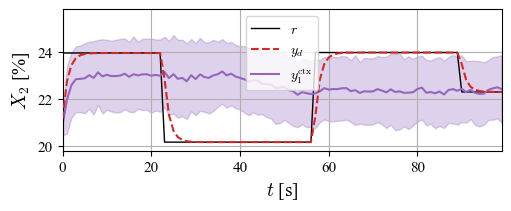

In [5]:
# Create a 2x1 subplot layout for the main figure
fig = plt.figure(figsize=(5, 2), constrained_layout=True)

mean_Y = Y_ctx[:,:,0].mean(axis=0)
std_Y = Y_ctx[:,:,0].std(axis=0)

plt.plot(t, R[0,:,0].T, label="$r$", c='k', linewidth=1)
plt.plot(t, Y_d[0,:,0].T, label="$y_d$", c='tab:red', linestyle='--', zorder=3)
plt.plot(mean_Y, color='tab:purple', label='$y_1^{\mathrm{ctx}}$')
plt.fill_between(range(len(mean_Y)), mean_Y - std_Y, mean_Y + std_Y, color='tab:purple', alpha=0.3)
# plt.plot(Y_log[:,:,0].T, color='tab:purple', alpha=0.2)

plt.ylim([19.8, 25.8])
plt.legend()

plt.xlabel('$t$ [s]')
plt.ylabel('$X_2$ [%]')

# plt.savefig('context_performance.pdf')

plt.show()

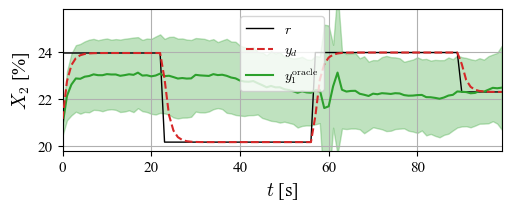

In [6]:
# Create a 2x1 subplot layout for the main figure
fig = plt.figure(figsize=(5, 2), constrained_layout=True)

mean_Y_oracle = Y_oracle.mean(axis=0).cpu().detach().numpy().flatten()
std_Y_oracle = Y_oracle.std(axis=0).cpu().detach().numpy().flatten()
mean_Y_sysid = Y_sysid.mean(axis=0).cpu().detach().numpy().flatten()
std_Y_sysid = Y_sysid.std(axis=0).cpu().detach().numpy().flatten()

plt.plot(t, R[0,:,0].T, label="$r$", c='k', linewidth=1)
plt.plot(t, Y_d[0,:,0].T, label="$y_d$", c='tab:red', linestyle='--', zorder=3)
plt.plot(mean_Y_oracle, color='tab:green', label='$y_1^{\mathrm{oracle}}$')
plt.fill_between(range(len(mean_Y_oracle)), mean_Y_oracle - std_Y_oracle, mean_Y_oracle + std_Y_oracle, color='tab:green', alpha=0.3)
# plt.plot(mean_Y_sysid, color='tab:orange', label='$x_1^{\mathrm{identif.}}$')
# plt.fill_between(range(len(mean_Y_sysid)), mean_Y_sysid - std_Y_sysid, mean_Y_sysid + std_Y_sysid, color='tab:orange', alpha=0.3)
# plt.plot(Y_log[:,:,0].T, color='tab:purple', alpha=0.2)
plt.ylim([19.8, 25.8])

plt.legend()

plt.xlabel('$t$ [s]')
plt.ylabel('$X_2$ [%]')

# plt.savefig('npmc_oracle_performance.pdf')

plt.show()

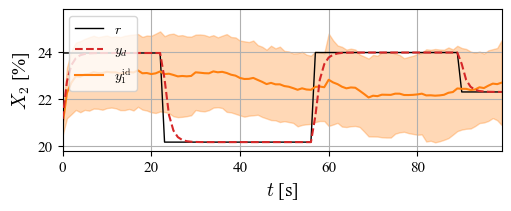

In [7]:
# Create a 2x1 subplot layout for the main figure
fig = plt.figure(figsize=(5, 2), constrained_layout=True)

mean_Y_oracle = Y_oracle.mean(axis=0).cpu().detach().numpy().flatten()
std_Y_oracle = Y_oracle.std(axis=0).cpu().detach().numpy().flatten()
mean_Y_sysid = Y_sysid.mean(axis=0).cpu().detach().numpy().flatten()
std_Y_sysid = Y_sysid.std(axis=0).cpu().detach().numpy().flatten()

plt.plot(t, R[0,:,0].T, label="$r$", c='k', linewidth=1)
plt.plot(t, Y_d[0,:,0].T, label="$y_d$", c='tab:red', linestyle='--', zorder=3)
# plt.plot(mean_Y_oracle, color='tab:blue', label='$x_1^{\mathrm{oracle}}$')
# plt.fill_between(range(len(mean_Y_oracle)), mean_Y_oracle - std_Y_oracle, mean_Y_oracle + std_Y_oracle, color='tab:blue', alpha=0.3)
plt.plot(mean_Y_sysid, color='tab:orange', label='$y_1^{\mathrm{id}}$')
plt.fill_between(range(len(mean_Y_sysid)), mean_Y_sysid - std_Y_sysid, mean_Y_sysid + std_Y_sysid, color='tab:orange', alpha=0.3)
# plt.plot(Y_log[:,:,0].T, color='tab:purple', alpha=0.2)
plt.ylim([19.8, 25.8])

plt.legend(loc="upper left")

plt.xlabel('$t$ [s]')
plt.ylabel('$X_2$ [%]')

# plt.savefig('nmpc_identified_performance.pdf')

plt.show()

In [8]:
E_ctx = (R - Y_ctx)
E_oracle = (R - Y_oracle.cpu().detach().numpy().reshape(-1,100,1))
E_sysid = (R - Y_sysid.cpu().detach().numpy().reshape(-1,100,1))

mean_E_ctx = E_ctx[:,:,0].mean(axis=1)
std_E_ctx = E_ctx[:,:,0].std(axis=1)
mean_E_oracle = E_oracle[:,:,0].mean(axis=1)
std_E_oracle = E_oracle[:,:,0].std(axis=1)
mean_E_sysid = E_sysid[:,:,0].mean(axis=1)
std_E_sysid = E_sysid[:,:,0].std(axis=1)
print('mean:', mean_E_ctx.mean())
print('std:', mean_E_ctx.std())
print('mean:', mean_E_oracle.mean())
print('std:', mean_E_oracle.std())
print('mean:', mean_E_sysid.mean())
print('std:', mean_E_sysid.std())

mean: 0.034903802871704095
std: 0.018332941163658096
mean: 0.08147048759460448
std: 0.10652821405884576
mean: -0.0276086139678955
std: 0.4030699502069315


In [9]:
# # Create a 2x1 subplot layout for the main figure
# fig = plt.figure(figsize=(5, 3), constrained_layout=True)
# 
# plt.plot(t, mean_E_ctx, c='tab:purple', alpha=1, linewidth=1, label="$\mathrm{ctx}$")
# plt.fill_between(range(len(mean_E_ctx)), mean_E_ctx - std_E_ctx, mean_E_ctx + std_E_ctx, color='tab:purple', alpha=0.3)
# plt.plot(t, mean_E_oracle, c='tab:green', alpha=1, linewidth=1, label="$\mathrm{o}$")
# plt.fill_between(range(len(mean_E_oracle)), mean_E_oracle - std_E_oracle, mean_E_oracle + std_E_oracle, color='tab:green', alpha=0.3)
# plt.plot(t, mean_E_sysid, c='tab:orange', alpha=1, linewidth=1, label="$\mathrm{id}$")
# plt.fill_between(range(len(mean_E_sysid)), mean_E_sysid - std_E_sysid, mean_E_sysid + std_E_sysid, color='tab:orange', alpha=0.2)
# plt.hlines(0, 0, 100, linestyles='dashed', color='tab:red')
# 
# # plt.ylim([-4.2, 2.5])
# 
# plt.legend(ncols=3)
# 
# plt.xlabel('$t$ [s]')
# plt.ylabel('$e$ [%]')
# 
# plt.savefig('error.pdf')
# 
# plt.show()

In [10]:
L_ctx = (Y_d[:,:,0] - Y_ctx[:,:,0])**2
L_oracle = (Y_d[:,:,0] - Y_oracle[:,0,:].cpu().detach().numpy())**2
L_sysid = (Y_d[:,:,0] - Y_sysid[:,0,:].cpu().detach().numpy())**2
mean_L_ctx = np.sqrt(L_ctx.mean(axis=1))
std_L_ctx = np.sqrt(L_ctx.std(axis=1))
mean_L_oracle = np.sqrt(L_oracle.mean(axis=1))
std_L_oracle = np.sqrt(L_oracle.std(axis=1))
mean_L_sysid = np.sqrt(L_sysid.mean(axis=1))
std_L_sysid = np.sqrt(L_sysid.std(axis=1))
print('mean:', mean_L_ctx.mean())
print('std:', mean_L_ctx.std())
print('mean:', mean_L_oracle.mean())
print('std:', mean_L_oracle.std())
print('mean:', mean_L_sysid.mean())
print('std:', mean_L_sysid.std())

mean: 0.23440421054061883
std: 0.03686242698161293
mean: 0.40965898686610724
std: 0.528759884550687
mean: 0.5071445929726168
std: 0.3983992274786775


/tmp/ipykernel_7880/755087774.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([mean_L_ctx, mean_L_sysid], notch=None, sym="", labels=["$\mathcal{C}$","$\mathrm{id}$-NMPC"])
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


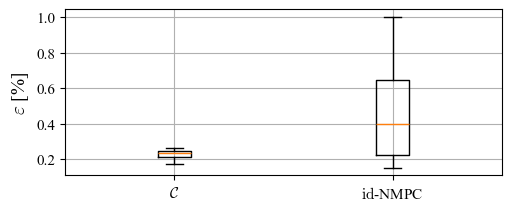

In [17]:
fig = plt.figure(figsize=(5,2), constrained_layout=True)

# plt.subplot(121)
# plt.boxplot([mean_E_ctx, mean_E_oracle, mean_E_sysid], notch=None, sym="", labels=["$\mathrm{ctx}$","$\mathrm{oracle}$","$\mathrm{id}$"])
# # plt.ylabel('$r - y$')
# plt.title("$e$ [%]")

plt.subplot(111)
# plt.boxplot([mean_L_ctx, mean_L_oracle, mean_L_sysid], notch=None, sym="", labels=["$\mathrm{ctx}$","$\mathrm{oracle}$","$\mathrm{id}$"])

plt.boxplot([mean_L_ctx, mean_L_sysid], notch=None, sym="", labels=["$\mathcal{C}$","$\mathrm{id}$-NMPC"])

plt.ylabel(r'$\varepsilon$ [%]')
# plt.title(r'$\varepsilon$ [%]')

plt.savefig('boxplot_mixed_3.pdf')

plt.show()

In [25]:
# #plt.plot(Y_ctx[0,:,0])
# import torch
# from dataset_CL_evaporation_process import EvaporationDataset
# from torch.utils.data import DataLoader
# 
# torch.cuda.set_device('cuda:3')
# dataset = EvaporationDataset(seq_len=100, ts=1, seed=42, data_perturb_percentage=0)
# dataloader = DataLoader(dataset, batch_size=1)
# 
# R = torch.empty(20,100,1)
# 
# for i in range(20):
#     batch_data, batch_r, batch_y_d = next(iter(dataloader))
#     R[i] = batch_r[0,:,:1]
# from dataset_CL_evaporation_process import EvaporationDataset

In [29]:
idxs = np.random.choice(np.arange(20), 4, replace=False)

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


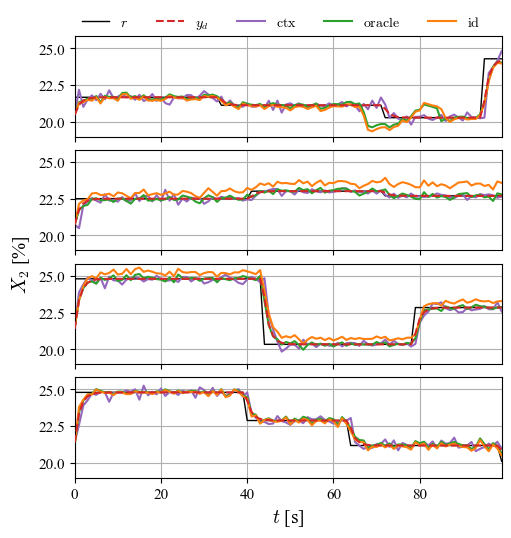

In [52]:

fig = plt.figure(figsize=(5,5), constrained_layout=True)

ax1 = fig.add_subplot(411)
plt.plot(t, R[idxs[0],:,0], label="$r$", c='k', linewidth=1)
plt.plot(t, Y_d[idxs[0],:,0].T, label="$y_d$", c='tab:red', linestyle='--', zorder=3)
plt.plot(Y_ctx[idxs[0],:,0].T, c="tab:purple", label="$\mathrm{ctx}$")
plt.plot(Y_oracle[idxs[0],0,:].cpu(), c="tab:green", label="$\mathrm{oracle}$")
plt.plot(Y_sysid[idxs[0],0,:].cpu(), c="tab:orange", label="$\mathrm{id}$")
# plt.ylabel('$X_2$ [%]')
plt.ylim([19, 25.8])

ax2 = fig.add_subplot(412)
plt.plot(t, R[idxs[1],:,0], label="$r$", c='k', linewidth=1)
plt.plot(t, Y_d[idxs[1],:,0].T, label="$y_d$", c='tab:red', linestyle='--', zorder=3)
plt.plot(Y_ctx[idxs[1],:,0].T, c="tab:purple", label="$\mathrm{ctx}$")
plt.plot(Y_oracle[idxs[1],0,:].cpu(), c="tab:green", label="$\mathrm{oracle}$")
plt.plot(Y_sysid[idxs[1],0,:].cpu(), c="tab:orange", label="$\mathrm{id}$")
plt.ylim([19, 25.8])


ax3 = fig.add_subplot(413)
plt.plot(t, R[idxs[2],:,0], label="$r$", c='k', linewidth=1)
plt.plot(t, Y_d[idxs[2],:,0].T, label="$y_d$", c='tab:red', linestyle='--', zorder=3)
plt.plot(Y_ctx[idxs[2],:,0].T, c="tab:purple", label="$\mathrm{ctx}$")
plt.plot(Y_oracle[idxs[2],0,:].cpu(), c="tab:green", label="$\mathrm{oracle}$")
plt.plot(Y_sysid[idxs[2],0,:].cpu(), c="tab:orange", label="$\mathrm{id}$")
plt.ylim([19, 25.8])
plt.ylabel('$X_2$ [%]')
ax3.yaxis.set_label_coords(-0.1,1)
# plt.xlabel('$t$ [s]')

ax4 = fig.add_subplot(414)
plt.plot(t, R[idxs[3],:,0], label="$r$", c='k', linewidth=1)
plt.plot(t, Y_d[idxs[3],:,0].T, label="$y_d$", c='tab:red', linestyle='--', zorder=3)
plt.plot(Y_ctx[idxs[3],:,0].T, c="tab:purple", label="$\mathrm{ctx}$")
plt.plot(Y_oracle[idxs[3],0,:].cpu(), c="tab:green", label="$\mathrm{oracle}$")
plt.plot(Y_sysid[idxs[3],0,:].cpu(), c="tab:orange", label="$\mathrm{id}$")
plt.xlabel('$t$ [s]')
# plt.tick_params('y', labelbottom='off')
plt.ylim([19, 25.8])

# plt.legend(loc="upper right", ncols=3)
# Optionally, remove x-ticks and y-ticks from subplots that share axes
# plt.setp(ax2.get_yticklabels(), visible=False)
# plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)

# Create a single legend at the top
handles, labels = ax1.get_legend_handles_labels()  # Collect handles and labels from the first subplot
fig.legend(handles, labels, loc='upper center', ncol=5, bbox_to_anchor=(.55, 1.06), frameon=False)  # Adjust ncol for number of legend entries


plt.savefig('4_examples_2.pdf', bbox_inches='tight')
plt.show()


In [81]:
idxs

array([ 0, 17, 15,  1])

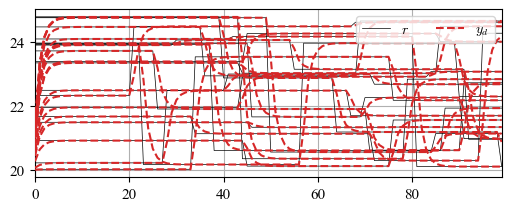

In [140]:
fig = plt.figure(figsize=(5,2), constrained_layout=True)

plt.plot(t, R[0,:,0].T, label="$r$", c='k', linewidth=0.5, alpha=1)
plt.plot(t, R[1:,:,0].T, label=None, c='k', linewidth=0.5, alpha=1)
plt.plot(t, Y_d[0,:,0].T, label="$y_d$", c='tab:red', linestyle='--', zorder=3, alpha=0.4)
plt.plot(t, Y_d[1:,:,0].T, label=None, c='tab:red', linestyle='--', zorder=3, alpha=0.4)

plt.legend(loc="upper right", ncols=2)

plt.show()